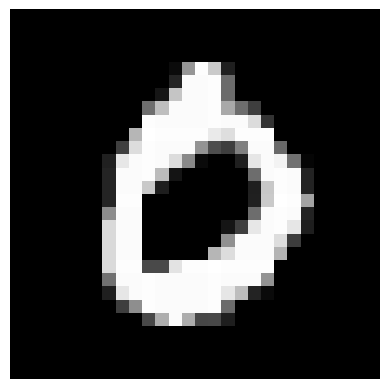

In [1]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
import os
import random
import matplotlib.pyplot as plt


csv_file = r"C:\Users\Aaditya\Desktop\ipcv_pracs\data\mnist_test.csv"  # Replace with the provided file name
data = pd.read_csv(csv_file)

labels = data.iloc[:, 0]  # First column: Labels
pixels = data.iloc[:, 1:]  # Remaining columns: Pixel data

# Directory to save images
output_dir = r"C:\Users\Aaditya\Desktop\ipcv_pracs\mnist_images"
os.makedirs(output_dir, exist_ok=True)

for idx, (label, pixel_values) in enumerate(zip(labels, pixels.values)):
    image_array = pixel_values.reshape(28, 28).astype(np.uint8)
    img = Image.fromarray(image_array)
    img.save(f"{output_dir}/{label}_{idx}.png")
    if idx >= 10: 
        break


image_files = [f for f in os.listdir(output_dir) if f.endswith(".png")]
random_image_file = random.choice(image_files)
random_image_path = os.path.join(output_dir, random_image_file)
random_img = Image.open(random_image_path)


plt.imshow(random_img, cmap="gray")
plt.axis('off')  
plt.show()




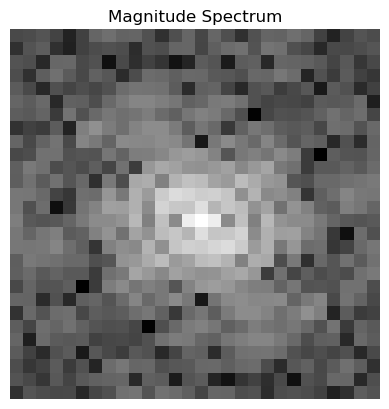

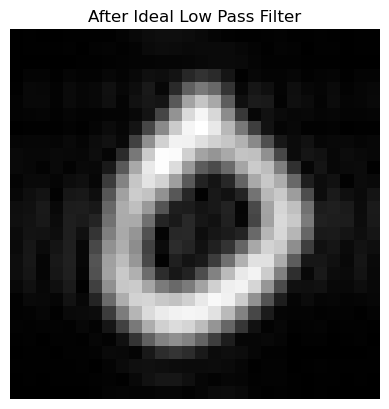

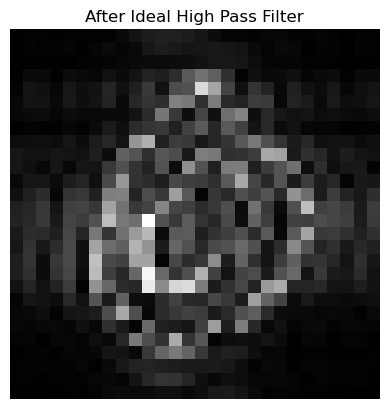

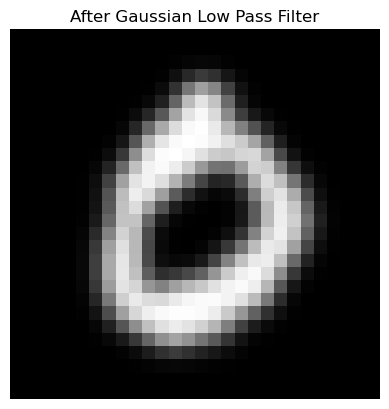

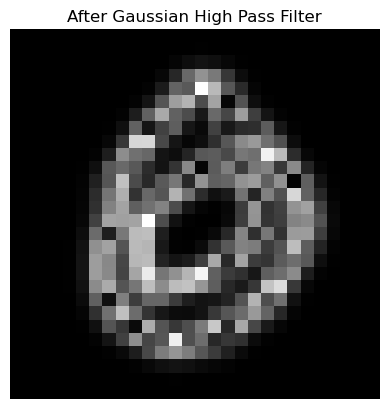

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Convert the random image to a numpy array
image_array = np.array(random_img)

# Step 4: Getting the Fourier Transform of the image
f = np.fft.fft2(image_array)  # Compute the 2D Fourier Transform
fshift = np.fft.fftshift(f)  # Shift zero frequency component to the center
magnitude_spectrum = np.log(np.abs(fshift) + 1)

# Display the magnitude spectrum of the Fourier Transformed image
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')
plt.show()

# Step 5: Ideal Low Pass Filter
def ideal_low_pass_filter(size, cutoff_radius):
    rows, cols = size
    crow, ccol = rows // 2, cols // 2  # Center of the image
    mask = np.zeros((rows, cols), dtype=np.float32)  # Create a mask
    mask[crow - cutoff_radius:crow + cutoff_radius, ccol - cutoff_radius:ccol + cutoff_radius] = 1
    return mask

# Apply Ideal Low Pass Filter
cutoff_radius = 5  # You can change this value for different cutoff frequencies
lp_filter = ideal_low_pass_filter(image_array.shape, cutoff_radius)
fshift_lp = fshift * lp_filter

# Inverse Fourier Transform of the filtered image
f_ishift_lp = np.fft.ifftshift(fshift_lp)
img_back_lp = np.fft.ifft2(f_ishift_lp)
img_back_lp = np.abs(img_back_lp)  # Take absolute value for real image

# Display the filtered image (Ideal Low Pass Filter)
plt.imshow(img_back_lp, cmap='gray')
plt.title("After Ideal Low Pass Filter")
plt.axis('off')
plt.show()

# Step 6: Ideal High Pass Filter
def ideal_high_pass_filter(size, cutoff_radius):
    rows, cols = size
    crow, ccol = rows // 2, cols // 2  # Center of the image
    mask = np.ones((rows, cols), dtype=np.float32)  # Create a mask with ones
    mask[crow - cutoff_radius:crow + cutoff_radius, ccol - cutoff_radius:ccol + cutoff_radius] = 0
    return mask

# Apply Ideal High Pass Filter
hp_filter = ideal_high_pass_filter(image_array.shape, cutoff_radius)
fshift_hp = fshift * hp_filter

# Inverse Fourier Transform of the filtered image
f_ishift_hp = np.fft.ifftshift(fshift_hp)
img_back_hp = np.fft.ifft2(f_ishift_hp)
img_back_hp = np.abs(img_back_hp)

# Display the filtered image (Ideal High Pass Filter)
plt.imshow(img_back_hp, cmap='gray')
plt.title("After Ideal High Pass Filter")
plt.axis('off')
plt.show()

# Step 7: Gaussian Low Pass Filter
def gaussian_low_pass_filter(size, cutoff_radius):
    rows, cols = size
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), dtype=np.float32)
    for i in range(rows):
        for j in range(cols):
            mask[i, j] = np.exp(-((i - crow) ** 2 + (j - ccol) ** 2) / (2 * (cutoff_radius ** 2)))
    return mask

# Apply Gaussian Low Pass Filter
gaussian_lp_filter = gaussian_low_pass_filter(image_array.shape, cutoff_radius)
fshift_glp = fshift * gaussian_lp_filter

# Inverse Fourier Transform of the filtered image
f_ishift_glp = np.fft.ifftshift(fshift_glp)
img_back_glp = np.fft.ifft2(f_ishift_glp)
img_back_glp = np.abs(img_back_glp)

# Display the filtered image (Gaussian Low Pass Filter)
plt.imshow(img_back_glp, cmap='gray')
plt.title("After Gaussian Low Pass Filter")
plt.axis('off')
plt.show()

# Step 8: Gaussian High Pass Filter
def gaussian_high_pass_filter(size, cutoff_radius):
    return 1 - gaussian_low_pass_filter(size, cutoff_radius)

# Apply Gaussian High Pass Filter
gaussian_hp_filter = gaussian_high_pass_filter(image_array.shape, cutoff_radius)
fshift_ghp = fshift * gaussian_hp_filter

# Inverse Fourier Transform of the filtered image
f_ishift_ghp = np.fft.ifftshift(fshift_ghp)
img_back_ghp = np.fft.ifft2(f_ishift_ghp)
img_back_ghp = np.abs(img_back_ghp)

# Display the filtered image (Gaussian High Pass Filter)
plt.imshow(img_back_ghp, cmap='gray')
plt.title("After Gaussian High Pass Filter")
plt.axis('off')
plt.show()
